**Hemp Classifier using fast.ai**

2020-08-27

In [1]:
!pip install -Uqq fastbook

In [2]:
%%capture
!pip install voila
!jupyter serverextension enable voila —sys-prefix

In [3]:
import fastbook

fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

D:\DEV\Anaconda\envs\fastai\lib\site-packages\fastbook\__init__.py:21: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [4]:
weed_types = 'hemp','common'
path = Path('dataset/plants')

In [5]:
fns = get_image_files(path)
fns

(#601) [Path('dataset/plants/common/0.jpg'),Path('dataset/plants/common/1.jpg'),Path('dataset/plants/common/10-Best-Indoor-Plants-Gear-Patrol-umbrella.jpg'),Path('dataset/plants/common/10.jpg'),Path('dataset/plants/common/100.jpg'),Path('dataset/plants/common/101.jpg'),Path('dataset/plants/common/102.jpg'),Path('dataset/plants/common/103.jpg'),Path('dataset/plants/common/105.jpg'),Path('dataset/plants/common/106.jpg')...]

In [6]:
#failed = verify_images(fns)
#failed

In [7]:
#failed.map(Path.unlink)

In [8]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.25, seed=42),
    get_y=parent_label,
    item_tfms=Resize(512))

dls = plants.dataloaders(path, num_workers=0)

In [9]:
#dls.valid.show_batch(max_n=4, nrows=1)

In [10]:
plants = plants.new(
    item_tfms=RandomResizedCrop(512, min_scale=0.3),
    batch_tfms=aug_transforms())

dls = plants.dataloaders(path, num_workers=0, bs=16)

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [12]:
learn.fine_tune(25)

epoch,train_loss,valid_loss,error_rate,time
0,0.760697,0.424216,0.173333,00:23


D:\DEV\Anaconda\envs\fastai\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


epoch,train_loss,valid_loss,error_rate,time
0,0.479212,0.278792,0.093333,00:26
1,0.358894,0.220818,0.073333,00:26
2,0.273094,0.225739,0.086667,00:26
3,0.255457,0.218310,0.053333,00:26
4,0.214460,0.265379,0.080000,00:27
5,0.177898,0.298186,0.100000,00:27
6,0.224952,0.442359,0.146667,00:28
7,0.187736,0.117106,0.053333,00:28
8,0.162458,0.194288,0.053333,00:28
9,0.180349,0.381929,0.073333,00:28


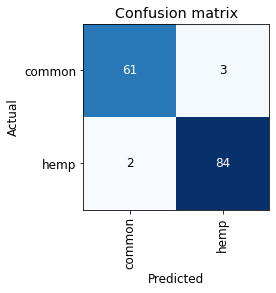

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

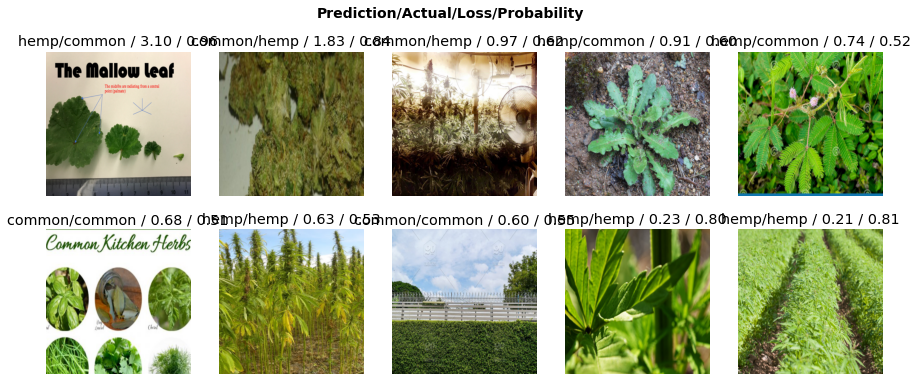

In [14]:
interp.plot_top_losses(10, nrows=2)

In [15]:
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [16]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [17]:
learn.export()

path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

In [18]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(144,144))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'    

btn_run.on_click(on_click_classify)

In [19]:
display(VBox([widgets.Label('Upload your plant image:'), btn_upload, btn_run, out_pl, lbl_pred]))